In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
plt.rcParams.update({
    "figure.facecolor":(1.0,1.0,1.0,1.0)
})

In [3]:
# Generate some data to use:

# x will be 25 random points in range (-5,5)
x = 10 * np.random.random(25) - 5
# y will be 2 * x + a random value in the range (-3,3)
y = x * 2 + (np.random.random(25) * 6 - 3)


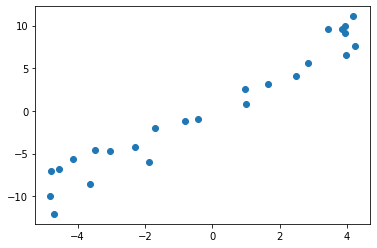

In [33]:
#plot x and y

plt.scatter(x=x,y=y)

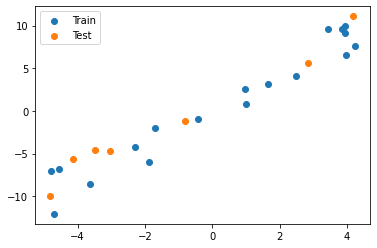

In [34]:
# Make a training and testing split for our regression
x_train, x_test, y_train, y_test = train_test_split(x,y)

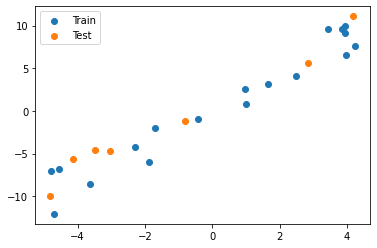

In [127]:
# Show the training and testing split
plt.scatter(x=x_train,y=y_train,)
plt.scatter(x=x_test,y=y_test)
plt.legend(['Train','Test'])
#plt.savefig("../images/points_split.png")

$\textrm{MSE}=\frac{1}{|\left\{\textrm{test}\right\}|}\sum\limits_{i\in\left\{\textrm{test}\right\}}(\hat{y}-y)^2$

In [130]:
# Define our MSE function:

def mse(x_actual, y_actual, y_pred):
    """ Computes the Root-Mean-Squared error on a set of values"""
    if (len(x_actual) != len(y_actual) != len(y_pred)):
        raise(Exception("Lengths of the x_actual, y_actual, and y_pred values were not equal."))
    return 1/len(y_actual) * np.sum(np.power((y_pred-y_actual),2))

# Vectorize mse so we can give it a np.array of values for m to get an array of values for mse(m)
mse_on_vals = np.vectorize((lambda m, x_actual, y_actual: mse(x_actual,y_actual,x_actual*m)),excluded=[1,2])

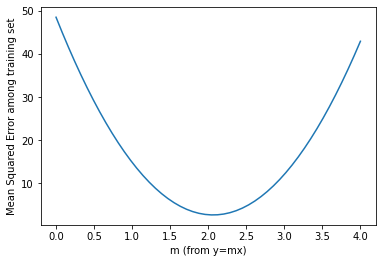

In [146]:
# Plot MSE values for given m:
# Let's look at m=[0,4]
m = np.linspace(0,4)
# Now let's compute the MSE for all the values in m's range:
err = mse_on_vals(m, x_train, y_train)

plt.plot(m,err)
plt.ylabel('Mean Squared Error among training set')
plt.xlabel('m (from y=mx)')
#plt.savefig('../images/graddescentbare.png')


Well, great, now we know how the error changes wrt different values for m, but how can we find where the error is the
least? Calculus probably - let's find the inflection point using gradient descent:

* Pick an initial point $x_0$
* Iterate until convergence: $x_{t+1} = x_t - \gamma_t\triangledown f(x_t)$

($\gamma_t$ is the $t^{th}$ step size)


2.0624323959115354 2.6977744476769034


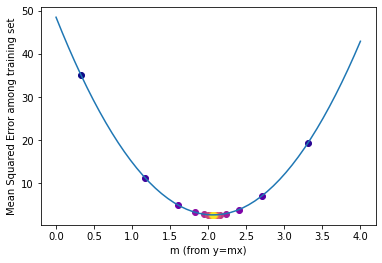

In [143]:
# Gradient Descent

# Start from a random initial point:
m_curr = np.random.random_sample()*4
# Determine the gradient at that point:
gamma = 0.8
# Crude, but works:
analytic_gradient_precision = .1
# Instead of testing for convergence, just doing a fixed number of steps:
steps = 20

plt.plot(m,err)
tried_m = []
tried_merr = []
for i in range(steps):
    plt.scatter(m_curr,mse(x_train,y_train,x_train*m_curr),color=plt.get_cmap('plasma')(i/steps))
    tried_m.append(m_curr)
    tried_merr.append(mse(x_train,y_train,x_train*m_curr))
    grad_array = np.array([m_curr-analytic_gradient_precision,
                          m_curr,
                          m_curr+analytic_gradient_precision])
    grad_curr = np.gradient(mse_on_vals(grad_array, x_train, y_train))[1]
    m_curr = m_curr - gamma * grad_curr

print(m_curr,mse(x_train,y_train,x_train*m_curr))
plt.ylabel('Mean Squared Error among training set')
plt.xlabel('m (from y=mx)')
#plt.savefig('../images/graddescent.png')

In [ ]:
# Show the fit line against the training points:

training_mse = mse(x_train,y_train,x_train*m_curr)
plt.plot(x_train,x_train*m_curr,color='orange')
plt.scatter(x=x_train,y=y_train,)
plt.legend([f'y={m_curr:0.2f}x','training data'])
print(f"MSE on data use for training: {training_mse}")
#plt.savefig('../images/fitontraining.png')

MSE on retained data for testing: 3.4841849777950635


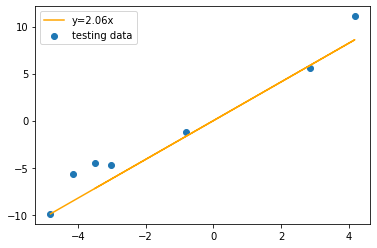

In [152]:
# Now let's see how well this predicts values which we didn't fit for:

testing_mse = mse(x_test,y_test,x_test*m_curr)
plt.scatter(x_test,y_test)
plt.plot(x_test,x_test*m_curr,color='orange')
plt.legend([f'y={m_curr:0.2f}x','testing data'])
print(f"MSE on retained data for testing: {testing_mse}")
#plt.savefig('../images/fitontesting.png')